In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
modules = read_csv('wgcna_output/renamed_tables/wgcna_output_ds4_mcs20_pF_geneMod.csv') %>%
distinct(name, genes, ortholog_ensg) %>%
group_by(name) %>%
summarise(n_ensmusg = length(genes),
          n_ensg = ortholog_ensg %>% na.omit %>% length) %>%
rename(module = name)

modules %>% head

Rows: 19770 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): data, run, cell_cluster, module, name, genes, ortholog_ensg, orthol...
dbl (2): pkMs, gene_loadings

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


module,n_ensmusg,n_ensg
<chr>,<int>,<int>
HPF__01,22,5
HPF__02,49,6
HPF__03,59,22
HPF__04,44,17
HPF__05,24,11
HPF__06,20,8


In [3]:
significant_modules = bind_rows(read_csv('wgcna_output/renamed_tables/mgcv/ds4_mcs20_pF_kME_cellModEmbed_16h_significant_modules.csv') %>% mutate(duration = '16h'), 
                                read_csv('wgcna_output/renamed_tables/mgcv/ds4_mcs20_pF_kME_cellModEmbed_24h_significant_modules.csv') %>% mutate(duration = '24h'),
                                read_csv('wgcna_output/renamed_tables/mgcv/ds4_mcs20_pF_kME_cellModEmbed_significant_modules.csv') %>% mutate(duration = 'both')) %>%
left_join(modules, by='module') %>%
rowwise %>%
mutate(region = str_split(module, fixed('__')) %>% unlist %>% `[`(1)) %>%
mutate(region = factor(region, levels=c("HY", 'HPF', 'SC', 'IC', 'PFC', 'ZI'))) %>%
arrange(region, pvalue)
significant_modules %>% head

Rows: 670 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): comparison, module
dbl (3): coef, pvalue, pvalue_bh

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 304 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): comparison, module
dbl (3): coef, pvalue, pvalue_bh

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 512 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): comparison, module
dbl (3): coef, pvalue, pvalue_bh

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


comparison,module,coef,pvalue,pvalue_bh,duration,n_ensmusg,n_ensg,region
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<fct>
chow.vs.fast,HY__50,0.20788818,4.138570e-06,0.001258125,24h,131,85,HY
chow.vs.fast,HY__50,0.13361297,4.625723e-06,0.002368370,both,131,85,HY
chow.vs.fast,HY__71,-0.09588819,3.188199e-05,0.007003392,both,248,233,HY
chow.vs.fast,HY__71,-0.15160800,5.928408e-05,0.009011179,24h,248,233,HY
chow.vs.fast,HY__50,0.04283113,3.678630e-04,0.246468204,16h,131,85,HY
chow.vs.fast,HY__71,-0.02796588,9.602221e-04,0.321674419,16h,248,233,HY


In [4]:
significant_modules_vec = significant_modules %>% 
filter(pvalue < 0.05, duration != 'both') %>%
distinct(module) %>% pull(module)

significant_modules_vec

[1] "HY__50"  "HY__71"  "HY__54"  "HY__34"  "HY__33"  "HY__59"  "HY__25" 
 [8] "HY__53"  "HY__41"  "HY__20"  "HY__78"  "HY__43"  "HY__19"  "HY__55" 
[15] "HY__07"  "HY__37"  "HY__49"  "HY__66"  "HPF__33" "HPF__17" "HPF__25"
[22] "HPF__05" "HPF__20" "HPF__26" "HPF__11" "HPF__32" "HPF__38" "HPF__24"
[29] "HPF__12" "HPF__27" "HPF__13" "SC__78"  "SC__32"  "SC__27"  "SC__67" 
[36] "SC__10"  "SC__79"  "SC__88"  "SC__15"  "SC__30"  "SC__31"  "SC__66" 
[43] "SC__45"  "SC__08"  "SC__35"  "SC__90"  "IC__15"  "IC__32"  "IC__07" 
[50] "IC__08"  "IC__34"  "IC__17"  "IC__26"  "IC__03"  "IC__47"  "PFC__75"
[57] "PFC__69" "ZI__18"  "ZI__44"

In [5]:
significant_modules_vec_bh = significant_modules %>% 
filter(pvalue_bh < 0.05, duration != 'both') %>%
distinct(module) %>% pull(module)

significant_modules_vec_bh

[1] "HY__50"  "HY__71"  "HPF__33" "SC__78"  "SC__32"  "IC__15"  "IC__32" 
[8] "IC__07"  "IC__08"

In [6]:
mb_taxonomy = read_csv('esmu/mb_website.csv') %>%
arrange(Index) %>%
mutate(Symbol = factor(Symbol, levels=Symbol)) %>%
arrange(Symbol)

mb_taxonomy %>% head

Rows: 265 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Symbol, Description, Neurotransmitter, Markers, Region, Likely loca...
dbl (2): Index, Cells

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Symbol,Index,Description,Neurotransmitter,Markers,Cells,Region,Likely location,Compartment,Taxon,Comment
<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
TEGLU1,1,"Excitatory neurons, cerebral cortex",VGLUT1VGLUT2VGLUT3,Myl4 Cpne4,402,Cortex,"Cingulate/Retrosplenial area, layer 6",Telencephalon,Telencephalon projecting excitatory neurons,Remaining heterogeneity for VGLUT3
TEGLU3,2,"Excitatory neurons, cerebral cortex",VGLUT1,Rprm Rell1,2734,Cortex,Cortex pyramidal layer 6,Telencephalon,Telencephalon projecting excitatory neurons,NA
TEGLU2,3,"Excitatory neurons, cerebral cortex",VGLUT1,Cplx3 Nxph3 Hs3st4,274,Cortex,Cortex pyramidal layer 6b,Telencephalon,Telencephalon projecting excitatory neurons,NA
TEGLU20,4,"Excitatory neurons, cerebral cortex",VGLUT1,Sulf1 Prss12,55,Cortex,Cortex pyramidal layer 6,Telencephalon,Telencephalon projecting excitatory neurons,Remaining heterogeneity for Nitric oxide
TEGLU11,5,"Excitatory neurons, cerebral cortex",VGLUT1,Igfbp6 C130074G19Rik,1464,Cortex,Cortical pyramidal (poor markers),Telencephalon,Telencephalon projecting excitatory neurons,NA
TEGLU12,6,"Excitatory neurons, cerebral cortex",VGLUT1VGLUT2,Nr4a2 Col24a1 Oprk1,386,Cortex,"Lateral cortex layer 6: gustatory, barrel field, auditory",Telencephalon,Telencephalon projecting excitatory neurons,NA


In [7]:
esmu_corr = read_csv('wgcna_output/renamed_tables/esmu_corr/kme_esmu_corr.csv') %>%
mutate(esmu_cell_type = factor(esmu_cell_type, levels = mb_taxonomy$Symbol)) %>% 
rowwise %>%
mutate(region = str_split(name, fixed('__')) %>% unlist %>% `[`(1)) %>%
mutate(region = factor(region, levels=c("HY", 'HPF', 'SC', 'IC', 'PFC', 'ZI'))) %>%
ungroup %>%
filter(name %in% significant_modules_vec) %>% 
mutate(correlation = case_when(correlation < 0 ~ 0,
                               is.na(correlation) ~ 0,
                               TRUE ~ correlation)) %>%
mutate(pvalue = case_when(correlation == 0 ~ 1,
                           TRUE ~ pvalue)) %>%
mutate(pvalue_bh = case_when(correlation == 0 ~ 1,
                             TRUE ~ pvalue)) %>%
arrange(region, name, esmu_cell_type) %>%
mutate(module = name) %>%
left_join(modules, by='module')

esmu_corr %>% head

Rows: 101230 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, esmu_cell_type
dbl (4): module_size_ensg, correlation, pvalue, pvalue_bh

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,esmu_cell_type,module_size_ensg,correlation,pvalue,pvalue_bh,region,module,n_ensmusg,n_ensg
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<int>,<int>
HY__07,TEGLU1,18,0.49499366,0.01837449,0.01837449,HY,HY__07,27,22
HY__07,TEGLU3,18,0.05986423,0.40673200,0.40673200,HY,HY__07,27,22
HY__07,TEGLU2,18,0.07394993,0.38528929,0.38528929,HY,HY__07,27,22
HY__07,TEGLU20,18,0.26510990,0.14384773,0.14384773,HY,HY__07,27,22
HY__07,TEGLU11,18,0.26996439,0.13931295,0.13931295,HY,HY__07,27,22
HY__07,TEGLU12,18,0.32175731,0.09644932,0.09644932,HY,HY__07,27,22


In [8]:
esmu_corr_plot = esmu_corr %>%
  filter(name %in% significant_modules_vec) %>%
#   filter(module_size_ensg >= 4) %>%
  mutate(name = factor(name, levels=significant_modules_vec)) %>%
  mutate(pvalue = pvalue_bh) %>%
  mutate(significant = case_when(name %in% significant_modules_vec_bh ~ '*',
                                 TRUE ~ '')) %>%
  mutate(pvalue = -log10(pvalue)) %>%
  mutate(pvalue = case_when(pvalue < -log10(0.05) ~ 0,
                            TRUE ~ pvalue)) %>%
  mutate(new_name = paste0('(', module_size_ensg, ' ENSGs) ', significant, name)) %>%
  select(name, esmu_cell_type, pvalue, new_name) %>%
#   pivot_wider(names_from = esmu_cell_type, values_from = pvalue) %>%
  rename(module = name) %>%
  arrange(module) %>%
  mutate(new_name = factor(new_name, levels=unique(new_name)))

esmu_corr_plot %>% head

significant_modules_vec_2 = esmu_corr_plot %>% pull(module) %>% unique

module,esmu_cell_type,pvalue,new_name
<fct>,<fct>,<dbl>,<fct>
HY__50,TEGLU1,0,(77 ENSGs) *HY__50
HY__50,TEGLU3,0,(77 ENSGs) *HY__50
HY__50,TEGLU2,0,(77 ENSGs) *HY__50
HY__50,TEGLU20,0,(77 ENSGs) *HY__50
HY__50,TEGLU11,0,(77 ENSGs) *HY__50
HY__50,TEGLU12,0,(77 ENSGs) *HY__50


In [9]:
esmu_corr_plot %>% pull(pvalue) %>% max

[1] 27.23735

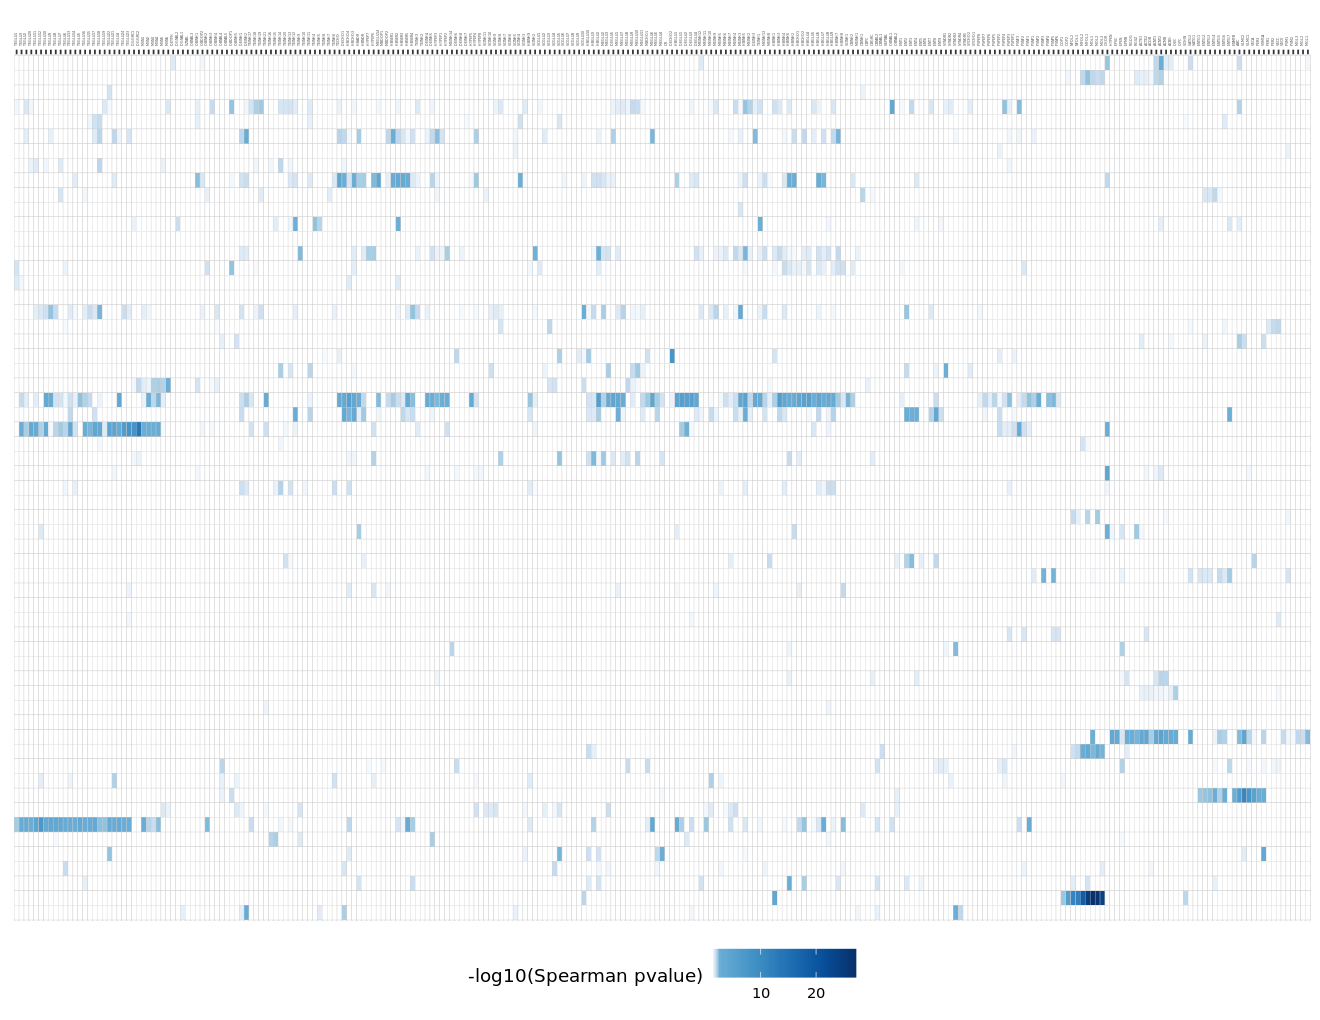

In [10]:
options(repr.plot.width=11, repr.plot.height=8.5)
# Load necessary libraries
library(tidyverse)
library(RColorBrewer)

# Re-order the factor levels of the module column in reverse order
esmu_corr_plot$new_name <- factor(esmu_corr_plot$new_name, levels = rev(unique(esmu_corr_plot$new_name)))

# Generate the color palette
palette <- colorRampPalette(brewer.pal(9, "Blues"))(512)
palette = c(c('#FFFFFF'), palette)

# Create the heatmap
gt = ggplot(esmu_corr_plot, aes(x = esmu_cell_type, y = new_name, fill = pvalue)) +
  geom_tile(colour = "gray80") +
  scale_fill_gradientn(colors = palette,
                       values = scales::rescale(c(0, -log10(0.05), esmu_corr_plot %>% pull(pvalue) %>% max)),
                       limits = c(-log10(0.05), esmu_corr_plot %>% pull(pvalue) %>% max),
                       oob = scales::oob_squish) +
  scale_x_discrete(position = "top") +
  theme(
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0, size=2),
#         axis.text.y = element_text(size=6),
        axis.ticks.y = element_blank(),
        axis.text.y = element_blank(),  
        axis.ticks.x = element_line(),
        axis.title.y = element_blank(),
        legend.position = "bottom") +
  labs(x = "", y = "Module", fill = "-log10(Spearman pvalue)")

gt
gt %>% ggsave('corr_esmu_matrix.pdf', plot=., width = 11, height = 8.5)

In [11]:
significant_modules %>%
filter(pvalue_bh < 0.05) %>%
arrange(n_ensg)

comparison,module,coef,pvalue,pvalue_bh,duration,n_ensmusg,n_ensg,region
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<fct>
chow.vs.fast,SC__27,-0.04701637,1.678408e-04,0.010741812,both,22,4,SC
chow.vs.HFD,HPF__17,-0.03989605,8.164698e-04,0.041803256,both,25,19,HPF
chow.vs.fast,HPF__33,0.12701618,2.737492e-04,0.013869961,24h,39,24,HPF
chow.vs.fast,IC__08,0.11770891,5.889459e-05,0.007538507,both,46,35,IC
chow.vs.fast,IC__08,0.14977742,1.321558e-03,0.049536016,24h,46,35,IC
chow.vs.fast,IC__07,-0.10337021,1.511013e-04,0.010741812,both,39,38,IC
chow.vs.fast,IC__07,-0.14618702,6.374605e-04,0.027684000,24h,39,38,IC
chow.vs.fast,IC__32,-0.11861996,9.705456e-05,0.009938387,both,57,41,IC
chow.vs.fast,IC__32,-0.17682802,2.418786e-04,0.013869961,24h,57,41,IC


In [12]:
lm_mod_plot = significant_modules %>%
  filter(module %in% significant_modules_vec_2) %>%
  mutate(module = factor(module, levels=significant_modules_vec)) %>%
  filter(duration != 'both') %>%
  rowwise %>%
  mutate(diet = str_split(comparison, fixed('.')) %>% unlist %>% `[[`(3)) %>%
  mutate(colname = paste0(duration, ' ', diet)) %>%
  mutate(colname = factor(colname, levels = c('16h HFD', '16h fast', '24h fast'))) %>%
  mutate(value = -log10(pvalue)) %>%
  mutate(value = case_when(coef > 0 ~ value,
                           coef < 0 ~ -value))

lm_mod_plot %>% head
lm_mod_plot %>% dim

comparison,module,coef,pvalue,pvalue_bh,duration,n_ensmusg,n_ensg,region,diet,colname,value
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<fct>,<chr>,<fct>,<dbl>
chow.vs.fast,HY__50,0.20788818,4.138570e-06,0.001258125,24h,131,85,HY,fast,24h fast,5.383150
chow.vs.fast,HY__71,-0.15160800,5.928408e-05,0.009011179,24h,248,233,HY,fast,24h fast,-4.227062
chow.vs.fast,HY__50,0.04283113,3.678630e-04,0.246468204,16h,131,85,HY,fast,16h fast,3.434314
chow.vs.fast,HY__71,-0.02796588,9.602221e-04,0.321674419,16h,248,233,HY,fast,16h fast,-3.017628
chow.vs.HFD,HY__54,0.12215175,1.823595e-03,0.336357081,16h,26,15,HY,HFD,16h HFD,2.739072
chow.vs.fast,HY__34,0.03783314,3.073856e-03,0.093445216,24h,38,38,HY,fast,24h fast,2.512317


[1] 171  12

In [13]:
lm_mod_plot %>% distinct(module) %>% dim

[1] 59  1


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




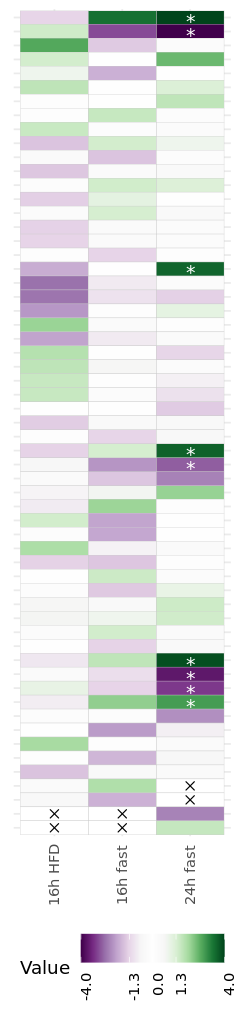

In [14]:
options(repr.plot.width=2, repr.plot.height=8.5)
library(RColorBrewer)
library(scales)
library(tidyr)

# Create a complete version of your data
complete_data <- expand_grid(colname = unique(lm_mod_plot$colname), 
                             module = unique(lm_mod_plot$module)) %>%
  left_join(lm_mod_plot, by = c("colname", "module"))

complete_data$module = factor(complete_data$module, levels = rev(unique(complete_data$module)))

threshold = 4
complete_data = complete_data %>%
mutate(value = case_when(value > threshold ~ threshold,
                         value < -threshold ~ -threshold,
                         TRUE ~ value))

# Colors for the gradient
color_pal <- brewer.pal(11, "PRGn") # 11 colors from PRGn palette

# Determine the break points of the colors
breaks <- c(-threshold, log10(0.05), 0, -log10(0.05), threshold)

# Create custom color palette, including the midpoint
custom_pal <- c(color_pal[1:5], "#F7F7F7", "#FFFFFF", "#F7F7F7", color_pal[7:11])
# Create an indicator for significance and extreme values
complete_data$significant <- ifelse(complete_data$pvalue_bh < 0.05, "*", "")

# Apply this palette to the data
colors <- colorRampPalette(custom_pal)(100)

label_fun <- function(x) {
    format(round(x, 1), nsmall = 1)
}

gt_module_lm = ggplot(complete_data, aes(x = colname, y = module)) +
  geom_tile(aes(fill = value), colour = "gray80") +
  scale_fill_gradientn(colors = colors, breaks = breaks, na.value = "white", labels = label_fun) +
  geom_point(data = subset(complete_data, is.na(value)), shape = 4, color = "black", size = 2) +
  geom_text(data = subset(complete_data, pvalue_bh < 0.05), aes(label = significant), color = "white", size = 4, hjust=0.5, vjust=0.75) +
  theme_minimal() +
  labs(x = "Colname", y = "Module", fill = "Value") +
  theme(axis.text.x = element_text(angle = 90, hjust = 0.5, vjust=0.5),
        legend.position = "bottom",
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.y = element_blank(),
        legend.text = element_text(angle = 90, hjust=1))

gt_module_lm

Warning message:
“Removed 12 rows containing missing values (`geom_text()`).”


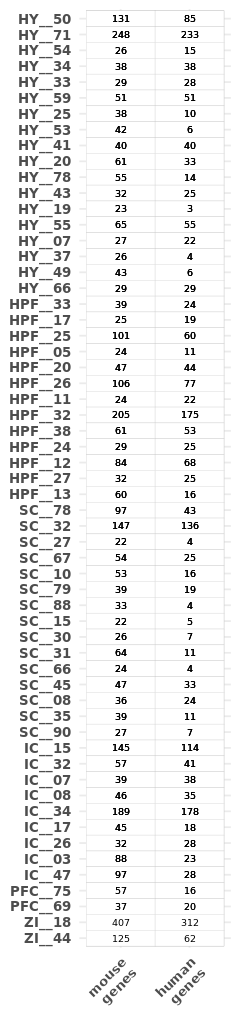

In [15]:
options(repr.plot.width=2, repr.plot.height=8.5)
# Pivot the data into long format
long_data <- complete_data %>%
  select(module, n_ensmusg, n_ensg) %>%
  pivot_longer(cols = c(n_ensmusg, n_ensg), names_to = "colname", values_to = "n")

# Adjust levels of the 'colname' factor
long_data$colname <- factor(long_data$colname, levels = c("n_ensmusg", "n_ensg"))

long_data = long_data %>% filter(module %in% significant_modules_vec_2)

# Create the plot
gt_module_size = ggplot(long_data, aes(x = colname, y = module)) +
  geom_tile(color = "gray80", fill = "white") +
  geom_text(aes(label = n), color = "black", size=2, vjust=0.5, hjust=0.5) +
  theme_minimal() +
  scale_x_discrete(labels = c("n_ensmusg" = "mouse\ngenes", "n_ensg" = "human\ngenes")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, face = "bold", size=8),
        axis.text.y = element_text(face = "bold", size=8),
        axis.title.y = element_blank(),
        axis.title.x = element_blank()) 

gt_module_size


In [16]:
library(patchwork)

Warning message:
“Removed 12 rows containing missing values (`geom_text()`).”


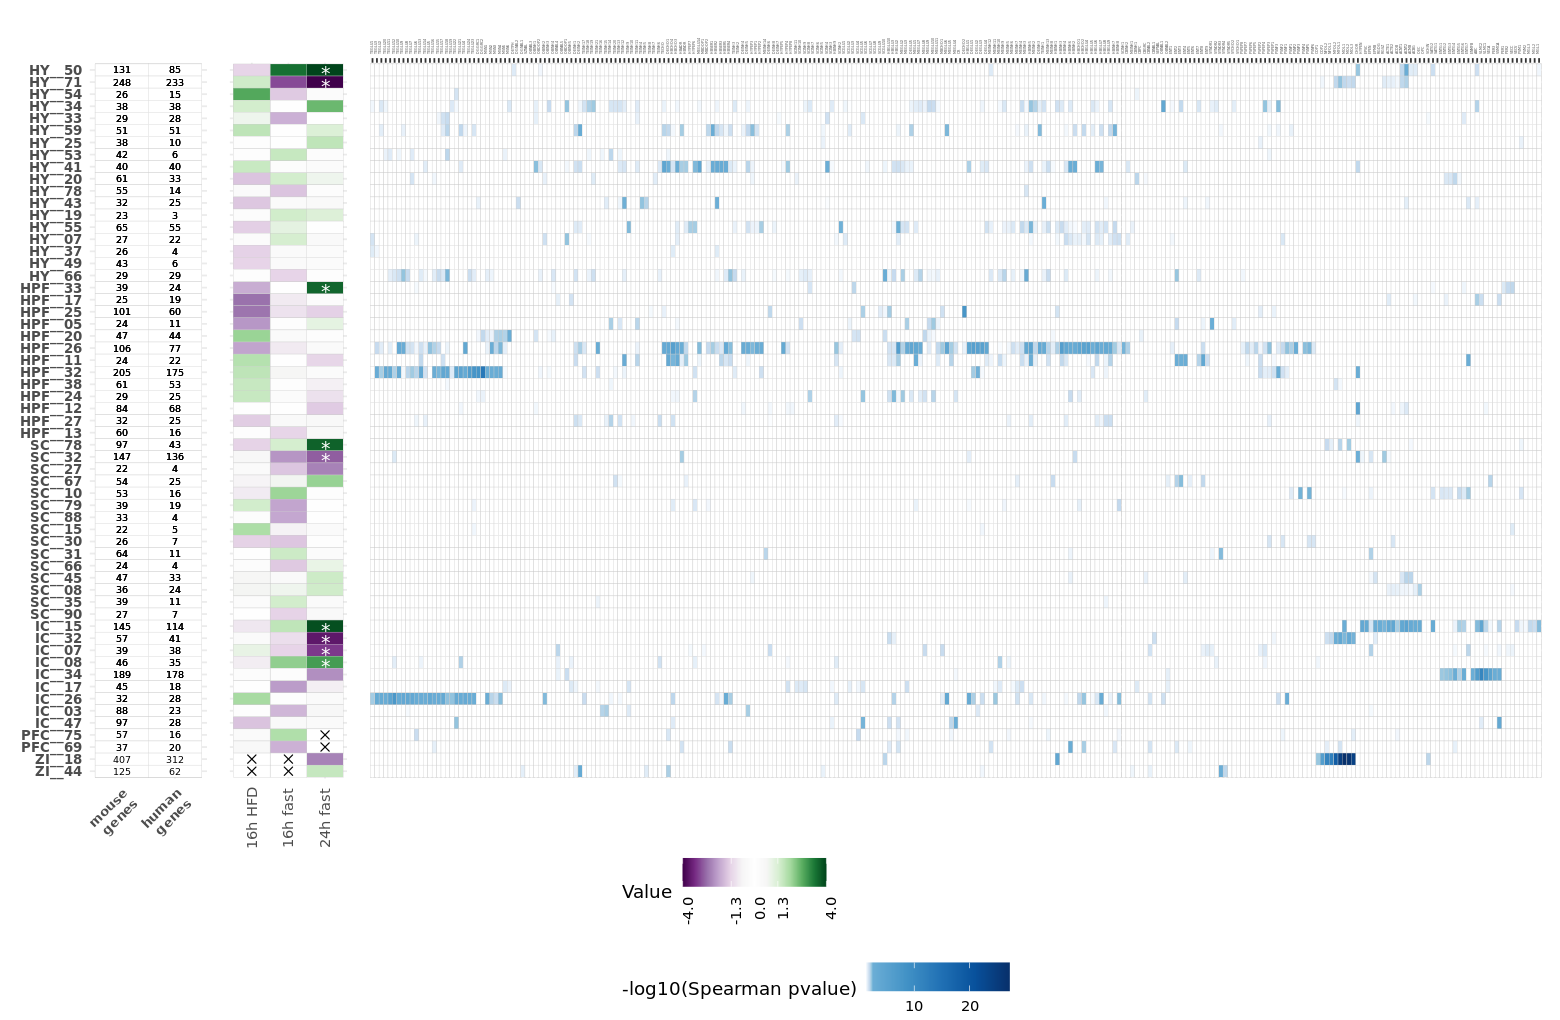

In [17]:
options(repr.plot.width=13, repr.plot.height=8.5)
layout <- "
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
ABCCCCCCCCCC
DDDDDDDDDDDD
DDDDDDDDDDDD
"
p = gt_module_size + gt_module_lm + gt + guide_area() + plot_layout(design = layout) + plot_layout(guides = 'collect') 
p

In [18]:
p %>% ggsave('esmu_corr_lm.pdf', plot=., width = 13, height = 8.5)

Warning message:
“Removed 12 rows containing missing values (`geom_text()`).”
